In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Explotary Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
columns=['TV', 'radio', 'newspaper', 'sales']
for i in columns:
    print(i,":-",len(df[i].value_counts()))

TV :- 190
radio :- 167
newspaper :- 172
sales :- 121


In [17]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [18]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

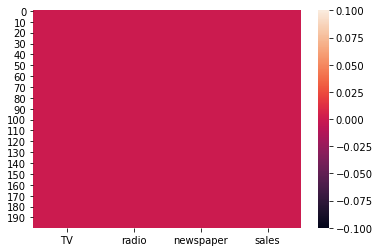

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


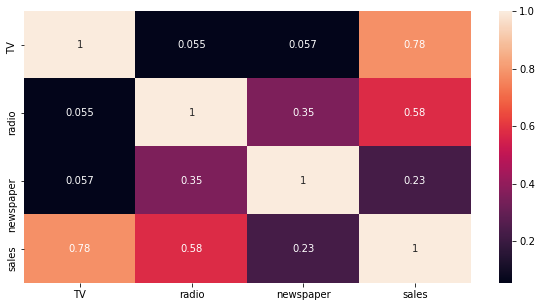

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
Correlation of Heatmap 

In [22]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

TV -0.06985336213274573


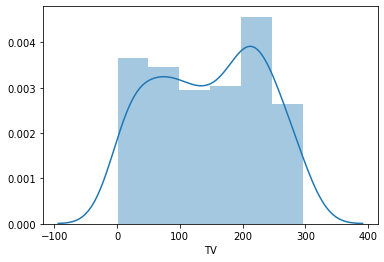

radio 0.09417463149664404


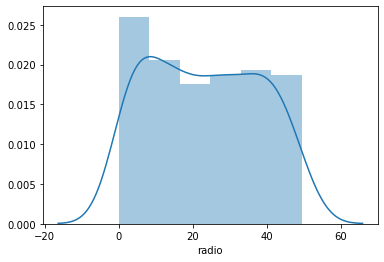

newspaper 0.8947204074986175


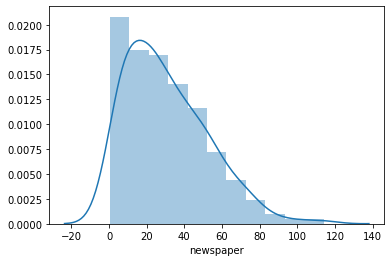

sales 0.4075714250767127


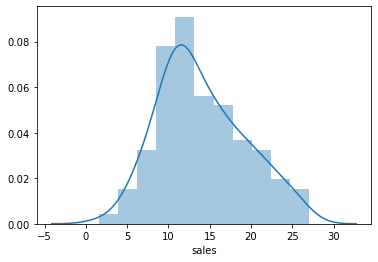

In [26]:
columns=['TV', 'radio', 'newspaper', 'sales']
for i in columns:
    print(i,df[i].skew())
    sns.distplot(df[i])
    plt.show()

TV              AxesSubplot(0.125,0.125;0.133621x0.755)
radio        AxesSubplot(0.285345,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.44569,0.125;0.133621x0.755)
sales        AxesSubplot(0.606034,0.125;0.133621x0.755)
dtype: object

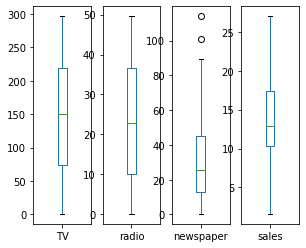

In [31]:
df.plot(kind='box',subplots=True,layout=(1,5))

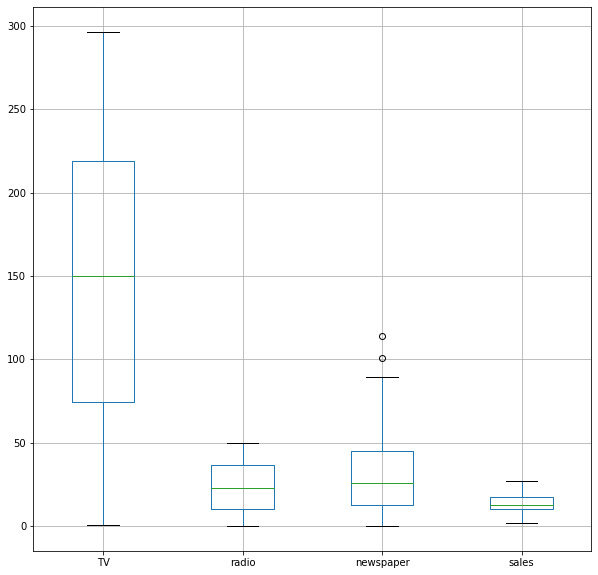

In [34]:
df.boxplot(figsize=(10,10))

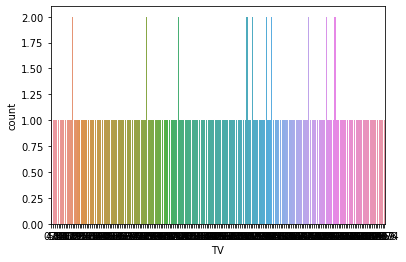

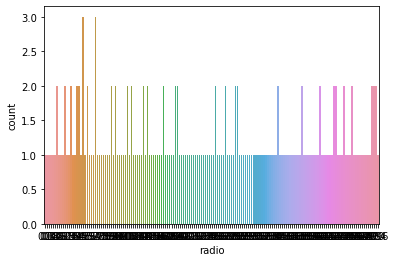

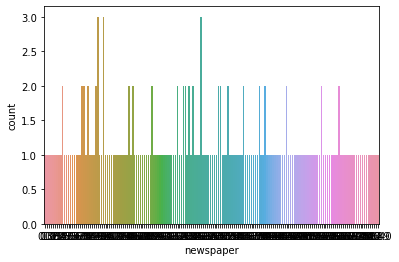

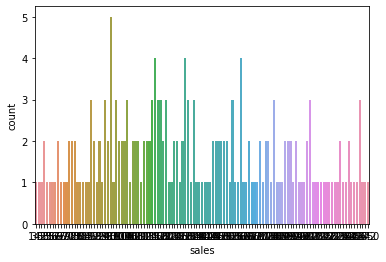

In [37]:
columns=['TV', 'radio', 'newspaper', 'sales']
for i in columns:
    sns.countplot(df[i])
    plt.show()

# Data Cleaning

In [39]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df['newspaper']=pt.fit_transform(pd.DataFrame(df['newspaper']))


In [40]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.077942
sales        0.407571
dtype: float64

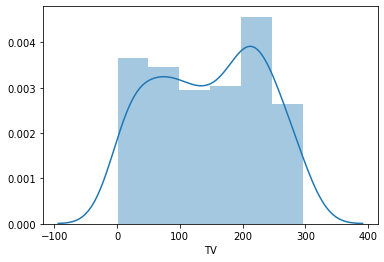

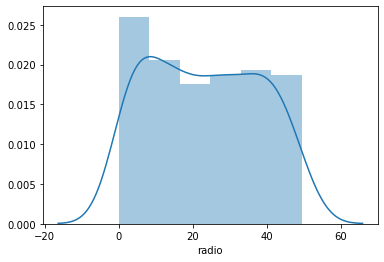

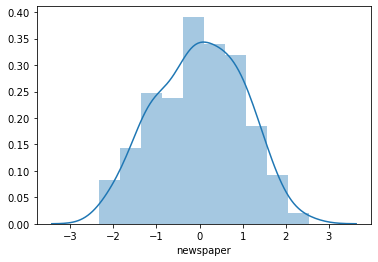

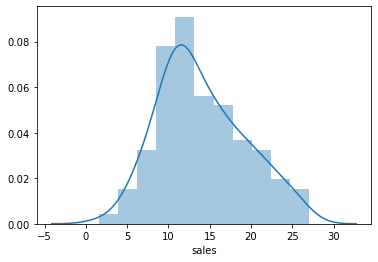

In [43]:
columns=['TV', 'radio', 'newspaper', 'sales']
for i in columns:
    sns.distplot(df[i])
    plt.show()

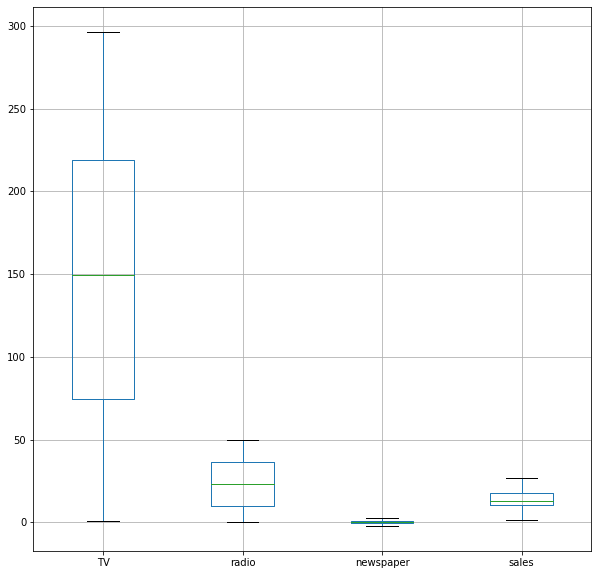

In [45]:
df.boxplot(figsize=(10,10))

In [59]:
x=df.drop('sales',axis=1)

In [ ]:
Inependent variable

In [60]:
y=df['sales']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
l=LinearRegression()
l.fit(x_train,y_train)
pred=l.predict(x_test)
print(r2_score(y_test,pred))  

0.9225015855732092


In [64]:
l.score(x_train,y_train)

0.8850824004287792

In [66]:
pred=l.predict(x_test)
print("Predcit result price:",pred)
print("actual price",y_test)

Predcit result price: [21.67332112 16.45675364  7.66839649 17.92367058 18.68429412 23.80764008
 16.30356796 13.46933641  9.17728498 17.3480638  14.46299624  9.84124233
 17.21345801 16.64455497 15.11994229 15.51748438 12.45364463 17.30432224
 11.01579287 18.03024085  9.30656937 12.7935976   8.75666245 10.45755907
 11.40458416 15.03774706  9.75877932 19.45089844 18.13402987 17.20949079
 21.55614305 14.72856721 16.22196714 12.39411206 19.96986777 15.37329225
 13.99784342 10.09876805 20.92288931  7.43759029  3.68927671  7.29280375
  6.00751584 18.43396906  8.33989933 14.10950731 14.94758247 20.3690882
 20.55632984 19.5715162  24.11952041 14.83246213  6.72422503 19.79368859
 18.85319301 12.5131513  14.21757496  6.12790464 15.34782201  9.57092349]
actual price 58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     

In [67]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.0547392560334128
Mean squared error: 1.9279045908975752
Root Mean Squared error: 1.3884900398985853


# Ensemble technique

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
para={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,para)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [70]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
rfs=r2_score(y_test,pred) 
print("R2 Score",rfs)

R2 Score 0.9828964761868286


# Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc)

cross val score 0.974871386468882


# Model Saving

In [76]:
import joblib
joblib.dump(rf,'advertising.obj')

['advertising.obj']

In [77]:
advertisingfile=joblib.load('advertising.obj')
advertisingfile.predict(x_train)

array([12.614, 13.17 ,  4.687, 20.727, 23.74 ,  7.11 ,  9.095, 18.045,
       15.11 ,  8.774, 20.38 , 22.039, 25.63 ,  7.135,  7.955, 15.759,
        8.968,  9.352, 22.389, 15.187, 15.457, 11.048, 12.221, 11.56 ,
        9.836,  9.814, 11.428,  5.535, 17.568, 15.064, 16.948, 24.94 ,
       13.435, 10.348, 18.739, 14.861,  7.944, 12.729, 10.643, 12.035,
        8.555, 12.348,  7.353, 16.295,  8.859, 18.358, 15.083, 15.721,
       11.504, 14.404, 21.853,  3.509, 14.128,  9.441, 23.267, 12.082,
       12.758,  2.954, 10.408, 15.541, 16.828, 19.211, 24.943, 14.594,
       10.305, 15.666, 10.62 , 10.33 , 12.25 ,  8.876,  9.685, 13.173,
        8.621, 11.965, 10.426, 15.466,  6.598, 10.954,  8.713, 20.407,
       11.49 , 11.88 , 21.858, 15.522, 17.03 , 22.375, 17.654, 17.748,
       19.417, 11.902, 22.032, 15.194,  7.196, 12.81 ,  9.564, 17.984,
       14.238,  9.596, 10.247, 12.329, 10.831, 21.258,  7.3  , 12.844,
       26.278,  5.197,  8.228, 24.005, 10.66 , 13.21 ,  6.109, 24.158,
      